This notebook is for playing around with code before we publish it

Abstract:

In Intro to Java, every student is told that the "random" class was full of pseudorandom numbers.  Because they are pseudorandom, they are therefore not secure.  In contrast, quantum computers are capable of generating truly random numbers.  The purpose of this study is to determine whether random numbers generated using Qiskit allow us to create better and stronger passwords.

Method:

First, we will write two password generators in Python that are almost the same, but the first will use Python's Random Module and the next one will use Qiskit.  Then, we will use tools like l0phtCrack, John the Ripper, HashCat, etc.  We will also measure the amount of time it takes each individual tool to crack passwords from both pieces of code.



QRNG based off of https://quantumcomputinguk.org/tutorials/16-qubit-random-number-generator.  Uses hadamard gates.  We are generating a 128 bit long number because AES uses 16 byte long numbers and assuming 1 byte = 8 bits 16 * 8 = 128.

In [ ]:
#!pip install qiskit

# NOTE: Code taken from https://quantumcomputinguk.org/tutorials/16-qubit-random-number-generator
# Many thanks to them.
import qiskit
from qiskit.tools.jupyter import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator

# Make sure Qiskit is working
#qiskit.__version__

# Use Aer's qasm_simulator
simulator = QasmSimulator()

q = QuantumRegister(128,'q')
c = ClassicalRegister(128,'c')
circuit = QuantumCircuit(q,c)
circuit.h(q) # Applies hadamard gate to all qubits
circuit.measure(q,c) # Measures all qubits 

#Execute simulation
job = execute(circuit, simulator, shots=1)
                               
print('Executing Job...\n')                 
job_monitor(job)
counts = job.result().get_counts()

print('RESULT: ',counts,'\n')
for i in counts:
  print(i)
print('Press any key to close')
input()



Executing Job...

Job Status: job has successfully run
RESULT:  {'00010001010000101011011100000101011001011001010001111101111110001011101011000001011010001011010111001011110101010110111011010110': 1} 

00010001010000101011011100000101011001011001010001111101111110001011101011000001011010001011010111001011110101010110111011010110
Press any key to close
x


'x'

Python os.urandom RNG that we will use to generate numbers to be compared to our QRNG above, which is a cryptographically secure RNG (https://stackoverflow.com/questions/47514695/whats-the-difference-between-os-urandom-and-random).

In [ ]:
import base64, os

def osurandomKeyGenerator():
  # create a 16 byte long number for use in AES
  key = os.urandom(16)
  keyint = int.from_bytes(key, "big")
  keybin = bin(keyint)
  print(int.from_bytes(key, "big"))
  print(keybin)

if __name__ == "__main__":
  osurandomKeyGenerator()

7215251578388947286897345943735528422
0b101011011011001101101011110010000111010111111111000000111010010011011011000001010000011101111001000100101100110101111100110


AES Encryption code that we will use to compare QRNG vs os.urandom and other CSPRNG or QRNG 16 byte numbers.

It should also be noted that we assume that a 16 byte number is the same as a 128 bit number.

Heavily inspired by https://gist.github.com/syedrakib/d71c463fc61852b8d366

This section isn't super important, but we were curious whether or not encryption affected the randomness of a number.

In [ ]:
#!pip install pycryptodome

from Crypto.Cipher import AES
import base64, os


def osurandomKeyGenerator():
  # create a 16 byte long number for use in AES
  key = os.urandom(16)
  keyint = int.from_bytes(key, "big")
  keybin = bin(keyint)
  print(int.from_bytes(key, "big"))
  print(keybin)
  encodedkey = base64.b64encode(key)
  print(int.from_bytes(encodedkey, "big"))
  return encodedkey

# Not super important
def encryptmessage(message, key, padding):
  pass

def decryptmessage(message, key, padding):
  pass

if __name__ == "__main__":
  word = osurandomKeyGenerator()
  print(word)

228950179358707470365195905146306848494
0b10101100001111100011001101011011110101001010110100110010101111100110011010111000101010111011010010000101100111100110011011101110
2801804606899017818076871844903471129494125244203282152765
b'rD4zW9StMr5muKu0hZ5m7g=='


A scatter plot will help us visualize how random our values are by allowing us to better see the distribution of our values.  Below, we compare the random module and os.urandom with respect to 2 byte numbers


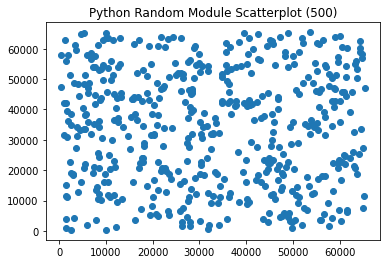

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import base64, os

def generateRandoms(numiterations, range):
  i = 0
  x = []
  y = []
  while i < numiterations:
    x.append(random.randrange(0, range))
    y.append(random.randrange(0, range))
    i = i + 1
  return x

def osurandomX(n):
  # create 2 byte numbers
  a = 0
  x_list = []
  while a < n:
    key = os.urandom(2)
    keyint = int.from_bytes(key, "big")
    # keybin = bin(keyint)
    x_list.append(keyint)
    a = a + 1
  return x_list

def osurandomY(n):
  # create 16 byte numbers
  b = 0
  y_list = []
  while b < n:
    key = os.urandom(2)
    keyint = int.from_bytes(key, "big")
    # keybin = bin(keyint)
    y_list.append(keyint)
    b = b + 1
  return y_list

if __name__ == "__main__":
  a = generateRandoms(500, 65535)
  b = generateRandoms(500, 65535)
  plt.title("Python Random Module Scatterplot (500)")
  plt.scatter(a, b)
  plt.show()

  #plt.title("Python os.urandom Scatterplot (100)")
  #plt.scatter(x=osurandomX(100), y=osurandomY(100))
  #plt.show()

  # Distribution looks to be about the same
  # Try increasing sample size
  #a = generateRandoms(1000, 65535)
  #b = generateRandoms(1000, 65535)
  #plt.title("Python Random Module Scatterplot (1000)")
  #plt.scatter(a, b)
  #plt.show()

  #plt.title("Python os.urandom Scatterplot (1000)")
  #plt.scatter(x=osurandomX(1000), y=osurandomY(1000))
  #plt.show()

  # Let's try 10,000 numbers for giggles
  #c = generateRandoms(10000, 65535)
  #d = generateRandoms(10000, 65535)
  #plt.title("Python Random Module Scatterplot (10,000)")
  #plt.scatter(c, d)
  #plt.show()

  #plt.title("Python os.urandom Scatterplot (10,000)")
  #plt.scatter(x=osurandomX(10000), y=osurandomY(10000))
  #plt.show()

Concluding thoughts

On the Scatter Plots, it appears that python.random can provide distributions very similar if not close to that of os.urandom.  

However, python.random relies on the Mersenne Twist Algorithm, which can be undone especially if you know the seed and finding the seed does not imply much work (https://github.com/tna0y/Python-random-module-cracker).  Therefore, 

Alternative os.urandom scatter plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


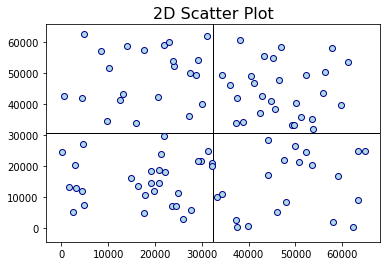

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64, os

def create_graph(x, y, xtick_labels=None, ytick_labels=None, ax=None):

    # make the data easier to work with by putting it in a dataframe
    data = pd.DataFrame({'x': x, 'y': y})

    # let the user specify their own axes
    ax = ax if ax else plt.axes()

    # calculate averages up front to avoid repeated calculations
    y_avg = data['y'].mean()
    x_avg = data['x'].mean()

    # set x limits
    adj_x = max((data['x'].max() - x_avg), (x_avg - data['x'].min())) * 1.1
    lb_x, ub_x = (x_avg - adj_x, x_avg + adj_x)
    ax.set_xlim(lb_x, ub_x)

    # set y limits
    adj_y = max((data['y'].max() - y_avg), (y_avg - data['y'].min())) * 1.1
    lb_y, ub_y = (y_avg - adj_y, y_avg + adj_y)
    ax.set_ylim(lb_y, ub_y)

    # set x tick labels
    if xtick_labels:
        ax.set_xticks([(x_avg - adj_x / 2), (x_avg + adj_x / 2)])
        ax.set_xticklabels(xtick_labels)

    # set y tick labels
    if ytick_labels:
        ax.set_yticks([(y_avg - adj_y / 2), (y_avg + adj_y / 2)])
        ax.set_yticklabels(ytick_labels, rotation='vertical', va='center')

    # plot points and quadrant lines
    ax.scatter(x=data['x'], y=data['y'], c='lightblue', edgecolor='darkblue',
    zorder=99)
    ax.axvline(x_avg, c='k', lw=1)
    ax.axhline(y_avg, c='k', lw=1)

if __name__ == "__main__":
  x_list = []
  y_list = []

  plt.title("2D Scatter Plot", fontsize=16)
  create_graph(
    x=osurandomX(100),
    y=osurandomY(100),
  )
  plt.show()

QISKIT turning the string into an int, then plotting the ints into a scatter plot

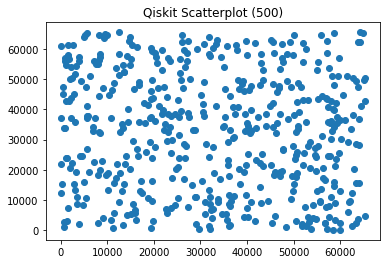

In [ ]:
#!pip install qiskit


import qiskit
from qiskit.tools.jupyter import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator

# Make sure Qiskit is working
#qiskit.__version__

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# I have no idea if this messes with the "randomness"
# but this function generates a bit and changes it to
# an int
def generatebit():
  q = QuantumRegister(1,'q')
  c = ClassicalRegister(1,'c')
  circuit = QuantumCircuit(q,c)
  circuit.h(q)
  circuit.measure(q,c)
  #Execute simulation
  job = execute(circuit, simulator, shots=1)                                        
  # job_monitor(job)
  counts = job.result().get_counts()
  for i in counts:
    if(i == "1"):
      #print(i)
      x = 1
    elif(i == "0"):
      #print(i)
      x = 0
  return x
  print('Press any key to close')
  input()
  pass

# This function adds an int into a list so we can generate a 
# 16 bit number if we pass the value 16 to it
def generateNum(bitslong):
  number = []
  while bitslong > 0:
    g = int(generatebit())
    number.append(g)
    bitslong = bitslong - 1
  return number

# This function isn't necessary, although I assumed
# (possibly erroneously) that the last bit generated would
# be the first one to converted into a number
def reverseList(list):
  return[element for element in reversed(list)]

# change the list of ints (0 or 1) into integers.
# In short, this function completes turning the binary
# into a usable int
def generateInt(bits):
  generatedbitvalue = 0
  exponent = 1
  list = generateNum(bits)
  #list = reverseList(list)
  #print(list)
  for item in list:
    if(item == 1):
      if(item == list[0]):
        generatedbitvalue = generatedbitvalue + exponent
        #print(generatedbitvalue)
        #print(f"exponent {exponent}")
        exponent = (exponent*2)
      else:
        generatedbitvalue = generatedbitvalue + exponent
        #print(f"exponent {exponent}")
        #print(generatedbitvalue)
        exponent = (exponent*2)
    elif(item == 0):
      #print(generatedbitvalue)
      #print(f"exponent {exponent}")
      exponent = (exponent*2)
  return generatedbitvalue

def numberLoop(iterations, bits):
  list = []
  while iterations > 0:
    list.append(generateInt(bits))
    iterations = iterations - 1
  return list
    

if __name__ == "__main__":
  #x = generateNum(16)
  #print(x)
  #y = reverseList(x)
  #print(y)
  #z = generateInt(5)
  #print(z)

  #plt.title("Qiskit Scatterplot (10)")
  #x = numberLoop(10, 16)
  #y = numberLoop(10, 16)
  #plt.scatter(x, y)
  #plt.show()

  plt.title("Qiskit Scatterplot (500)")
  x = numberLoop(500, 16)
  y = numberLoop(500, 16)
  plt.scatter(x, y)
  plt.show()

# Interesting but this takes at least 5 1/2 minutes to complete
  #plt.title("Qiskit Scatterplot (1000)")
  #x = numberLoop(1000, 16)
  #y = numberLoop(1000, 16)
  #plt.scatter(x, y)
  #plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


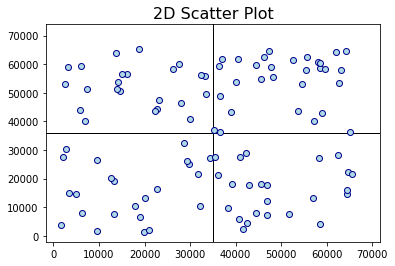

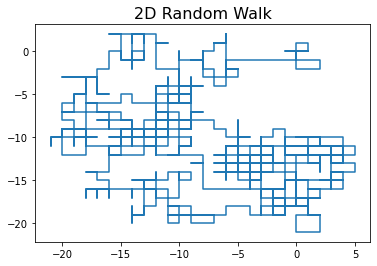

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64, os

def osuKeyWalkX(n):
  # create 16 byte numbers
  a = 0
  x_list = []
  while a < n:
    key = os.urandom(2)
    keyint = int.from_bytes(key, "big")
    # keybin = bin(keyint)
    x_list.append(keyint)
    a = a + 1
  return x_list

def osuKeyWalkY(n):
  # create 16 byte numbers
  b = 0
  y_list = []
  while b < n:
    key = os.urandom(2)
    keyint = int.from_bytes(key, "big")
    # keybin = bin(keyint)
    y_list.append(keyint)
    b = b + 1
  return y_list

def create_graph(x, y, xtick_labels=None, ytick_labels=None, ax=None):

    # make the data easier to work with by putting it in a dataframe
    data = pd.DataFrame({'x': x, 'y': y})

    # let the user specify their own axes
    ax = ax if ax else plt.axes()

    # calculate averages up front to avoid repeated calculations
    y_avg = data['y'].mean()
    x_avg = data['x'].mean()

    # set x limits
    adj_x = max((data['x'].max() - x_avg), (x_avg - data['x'].min())) * 1.1
    lb_x, ub_x = (x_avg - adj_x, x_avg + adj_x)
    ax.set_xlim(lb_x, ub_x)

    # set y limits
    adj_y = max((data['y'].max() - y_avg), (y_avg - data['y'].min())) * 1.1
    lb_y, ub_y = (y_avg - adj_y, y_avg + adj_y)
    ax.set_ylim(lb_y, ub_y)

    # set x tick labels
    if xtick_labels:
        ax.set_xticks([(x_avg - adj_x / 2), (x_avg + adj_x / 2)])
        ax.set_xticklabels(xtick_labels)

    # set y tick labels
    if ytick_labels:
        ax.set_yticks([(y_avg - adj_y / 2), (y_avg + adj_y / 2)])
        ax.set_yticklabels(ytick_labels, rotation='vertical', va='center')

    # plot points and quadrant lines
    ax.scatter(x=data['x'], y=data['y'], c='lightblue', edgecolor='darkblue',
    zorder=99)
    ax.axvline(x_avg, c='k', lw=1)
    ax.axhline(y_avg, c='k', lw=1)

def randomWalk2D(n):
  x = np.zeros(n)
  y = np.zeros(n)
  step = "UP"
  directions = ["UP", "DOWN", "LEFT", "RIGHT"]
  for i in range(1, n):
    key = os.urandom(2)
    keyint = int.from_bytes(key, "big")
    #print(keyint)
    if(keyint < 16383):
      x[i] = x[i - 1]
      y[i] = y[i - 1] + 1
    elif(keyint >= 16383 and keyint <= 32766):
      x[i] = x[i - 1]
      y[i] = y[i - 1] - 1
    elif(keyint >= 32766 and keyint <= 49149):
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1]
    elif(keyint >= 49149 and keyint <= 65535):
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1]
  plt.plot(x, y)
  return x, y

if __name__ == "__main__":
  x_list = []
  y_list = []

  plt.title("2D Scatter Plot", fontsize=16)
  create_graph(
    x=osuKeyWalkX(100),
    y=osuKeyWalkY(100),
  )
  plt.show()

  plt.title('2D Random Walk', fontsize=16)
  randomWalk2D(1000)
  plt.show()

Additionally, let us compare os.urandom to QRNG with random walk graphs

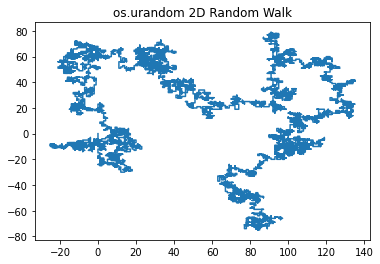

256


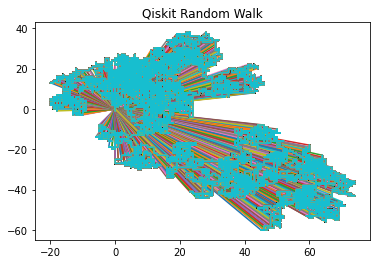

In [ ]:
#!pip install qiskit

import base64, os
import qiskit
from qiskit.tools.jupyter import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def generatebit():
  simulator = QasmSimulator()
  q = QuantumRegister(1,'q')
  c = ClassicalRegister(1,'c')
  circuit = QuantumCircuit(q,c)
  circuit.h(q)
  circuit.measure(q,c)
  #Execute simulation
  job = execute(circuit, simulator, shots=1)                                        
  # job_monitor(job)
  counts = job.result().get_counts()
  for i in counts:
    if(i == "1"):
      #print(i)
      x = 1
    elif(i == "0"):
      #print(i)
      x = 0
  return x
  pass



def generateNum(bitslong):
  number = []
  while bitslong > 0:
    g = int(generatebit())
    number.append(g)
    bitslong = bitslong - 1
  return number


def reverseList(list):
  return[element for element in reversed(list)]



def generateInt(bits):
  generatedbitvalue = 0
  exponent = 1
  list = generateNum(bits)
  #list = reverseList(list)
  #print(list)
  for item in list:
    if(item == 1):
      if(item == list[0]):
        generatedbitvalue = generatedbitvalue + exponent
        #print(generatedbitvalue)
        #print(f"exponent {exponent}")
        exponent = (exponent*2)
      else:
        generatedbitvalue = generatedbitvalue + exponent
        #print(f"exponent {exponent}")
        #print(generatedbitvalue)
        exponent = (exponent*2)
    elif(item == 0):
      #print(generatedbitvalue)
      #print(f"exponent {exponent}")
      exponent = (exponent*2)
  return generatedbitvalue

def numberLoop(iterations, bits):
  list = []
  x = np.zeros(iterations)
  y = np.zeros(iterations)
  max = 2**bits
  print(max)
  a = max/4
  b = max/2
  c = max*(3/4)
  i = 0
  j = iterations
  while j > 0:
    list.append(generateInt(bits))
    j = j - 1
  while i < iterations:
    item = list[i]
    if(item <= a):
      x[i] = x[i - 1]
      y[i] = y[i - 1] + 1
    elif(item > a and item <= b):
      x[i] = x[i - 1]
      y[i] = y[i - 1] - 1
    elif(item > b and item <= c):
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1]
    elif(item > c and item < max):
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1]
    plt.plot(x, y)
    i += 1
  pass


def qiskitRandomWalk(range, iterations):
  # range = iterations in numberLoop
  x = np.zeros(range)
  y = np.zeros(range)
  iter = iterations
  k = []
  while iter > 0:
    j = generateInt(8)
    k.append(j)
  for i in k:
    if(i < 64):
      x[i] = x[i - 1]
      y[i] = y[i - 1] + 1
    elif(i >= 64 and i < 128):
      x[i] = x[i - 1]
      y[i] = y[i - 1] - 1
    elif(i >= 128 and i < 192):
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1]
    elif(i >= 192 and i < 256):
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1]
  iter = iter - 1
  plt.plot(x, y)
  return x, y


def randomWalk2D(n):
  x = np.zeros(n)
  y = np.zeros(n)
  for i in range(1, n):
    key = os.urandom(1)
    keyint = int.from_bytes(key, "big")
    if(keyint < 64):
      x[i] = x[i - 1]
      y[i] = y[i - 1] + 1
    elif(keyint >= 64 and keyint < 128):
      x[i] = x[i - 1]
      y[i] = y[i - 1] - 1
    elif(keyint >= 128 and keyint < 192):
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1]
    elif(keyint >= 192 and keyint < 256):
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1]
  return x, y


if __name__ == "__main__":
  x_data, y_data = randomWalk2D(10000)
  plt.title("os.urandom 2D Random Walk")
  plt.plot(x_data, y_data)
  plt.show()


  plt.title("Qiskit Random Walk")
  numberLoop(10000, 8)
  plt.show

Longest Consecutive Sequence of 1's (os.urandom)

It should be noted that while some numbers end up being smaller, this is fine; this is because the previous numbers were converted from bytes to ints and then bits, removing unnecessary bytes.

Ex: 001 = 01 = 1 in binary


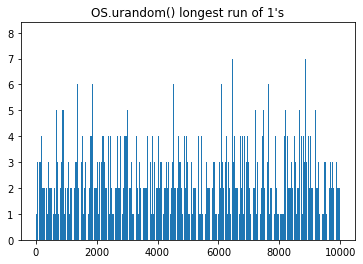

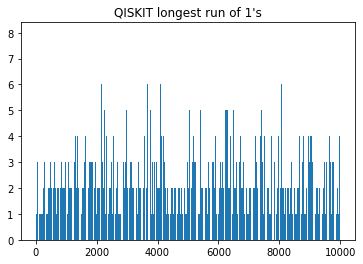

In [ ]:
#!pip install qiskit
import os

import base64, os
import qiskit
from qiskit.tools.jupyter import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator

from matplotlib import pyplot as plt

def generatebit():
  simulator = QasmSimulator()
  q = QuantumRegister(1,'q')
  c = ClassicalRegister(1,'c')
  circuit = QuantumCircuit(q,c)
  circuit.h(q)
  circuit.measure(q,c)
  #Execute simulation
  job = execute(circuit, simulator, shots=1)                                        
  # job_monitor(job)
  counts = job.result().get_counts()
  for i in counts:
    if(i == "1"):
      #print(i)
      x = 1
    elif(i == "0"):
      #print(i)
      x = 0
  return x
  pass


def generateNum(bitslong):
  number = []
  while bitslong > 0:
    g = int(generatebit())
    number.append(g)
    bitslong = bitslong - 1
  return number


def reverseList(list):
  return[element for element in reversed(list)]


def generateInt(bits):
  generatedbitvalue = 0
  exponent = 1
  list = generateNum(bits)
  #list = reverseList(list)
  #print(list)
  for item in list:
    if(item == 1):
      if(item == list[0]):
        generatedbitvalue = generatedbitvalue + exponent
        #print(generatedbitvalue)
        #print(f"exponent {exponent}")
        exponent = (exponent*2)
      else:
        generatedbitvalue = generatedbitvalue + exponent
        #print(f"exponent {exponent}")
        #print(generatedbitvalue)
        exponent = (exponent*2)
    elif(item == 0):
      #print(generatedbitvalue)
      #print(f"exponent {exponent}")
      exponent = (exponent*2)
  return generatedbitvalue

def generateQuantBlock(iterations, length):
  qlist = []
  i = 0
  while i < iterations:
    p = bin(generateInt(8))
    qlist.append(p)
    i += 1
  return(qlist)

def generateblock(iterations, length):
  list = []
  i = 0
  while i < iterations:
    p = int.from_bytes(os.urandom(length), "big")
    # check our numbers
    #print(p)
    x = str(bin(p))
    list.append(x)
    i += 1
  return list

def splitnum(number):
  # Takes a string of binary numbers and splits it apart
  return[char for char in number]

def longestrun(list):
  counted = []
  run = 0
  runs = []
  largest = 0
  longestruns = []
  for x in list:
    counted.append(splitnum(x))
  for y in counted:
    # reset variables
    runs = []
    run = 0
    largest = 0
    for z in y:
      if(z == '0'):
        if(run == 0):
          # ignore first 0 and any run = 0
          pass
        else:
          # otherwise add run to list runs
          runs.append(run)
        run = 0
      elif(z == '1'):
        # increment run
        run = run + 1
      elif(z == 'b'):
        # ignore the b that says this was a binary
        pass
    if(run > 0):
      runs.append(run)
    # View counts and each item (optional)
    #print(counted)
    #print(runs)
    for a in runs:
      if(a > largest):
        largest = a
    longestruns.append(largest)
  return(longestruns)

def makexaxis(len):
  axislist = []
  a = 1
  while a < len + 1:
    axislist.append(a)
    a += 1
  return axislist


if __name__ == "__main__":
  block = generateblock(10000, 1)
  quantumblock = generateQuantBlock(10000, 8)
  
  plt.title("OS.urandom() longest run of 1's")
  x = makexaxis(10000)
  y = longestrun(block)
  plt.bar(x, y)
  plt.show()

  plt.title("QISKIT longest run of 1's")
  y = longestrun(quantumblock)
  plt.bar(x, y)
  plt.show()

Ratio of 1's to 0's analysis

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


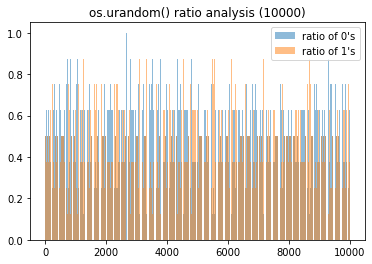

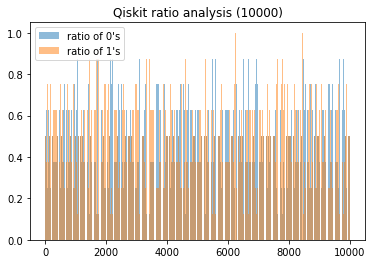

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt

#!pip install qiskit
import base64, os
import qiskit
from qiskit.tools.jupyter import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator


list1 = []
list2 = []

def generatebit():
  simulator = QasmSimulator()
  q = QuantumRegister(1,'q')
  c = ClassicalRegister(1,'c')
  circuit = QuantumCircuit(q,c)
  circuit.h(q)
  circuit.measure(q,c)
  #Execute simulation
  job = execute(circuit, simulator, shots=1)                                        
  # job_monitor(job)
  counts = job.result().get_counts()
  for i in counts:
    if(i == "1"):
      #print(i)
      x = 1
    elif(i == "0"):
      #print(i)
      x = 0
  return x
  pass


def generateNum(bitslong):
  number = []
  while bitslong > 0:
    g = int(generatebit())
    number.append(g)
    bitslong = bitslong - 1
  return number


def reverseList(list):
  return[element for element in reversed(list)]


def generateInt(bits):
  generatedbitvalue = 0
  exponent = 1
  list = generateNum(bits)
  #list = reverseList(list)
  #print(list)
  for item in list:
    if(item == 1):
      if(item == list[0]):
        generatedbitvalue = generatedbitvalue + exponent
        #print(generatedbitvalue)
        #print(f"exponent {exponent}")
        exponent = (exponent*2)
      else:
        generatedbitvalue = generatedbitvalue + exponent
        #print(f"exponent {exponent}")
        #print(generatedbitvalue)
        exponent = (exponent*2)
    elif(item == 0):
      #print(generatedbitvalue)
      #print(f"exponent {exponent}")
      exponent = (exponent*2)
  return generatedbitvalue

# Same as below but QRNG
def generateQuantBlock(iterations, length):
  qlist = []
  i = 0
  while i < iterations:
    p = bin(generateInt(8))
    qlist.append(p)
    i += 1
  return(qlist)


# Due to similarity of above problem, some code is reused
def generateblock(iterations, length):
  list = []
  i = 0
  while i < iterations:
    x = str(bin(int.from_bytes(os.urandom(length), "big")))
    list.append(x)
    i += 1
  return list


def splitnum(number):
  # Takes a string of binary numbers and splits it apart
  return[char for char in number]

def analyzeratio(block):
  global list1
  global list2
  list1 = []
  list2 = []
  splitblock = []
  numx = 0
  numy = 0
  for a in block:
    num = splitnum(a)
    num.pop(0)
    num.pop(0)
    # re add lost 0's
    if(len(num) < 8):
      p = len(num)
      while p < 8:
        num = ['0'] + num
        p += 1
    splitblock.append(num)
    p = len(num)
  #print(splitblock)
  for b in splitblock:
    numx = 0
    numy = 0
    for c in b:
      if(c == '0'):
          numx += 1
      elif(c == '1'):
        numy += 1
      elif(c == 'b'):
        pass  
    numz = numx + numy
    num1 = numx/numz
    num2 = numy/numz
    list1.append(num1)
    list2.append(num2)
    #print(f"There are {numx} 0's and {numy} 1's, {num1} 0's, and {num2} 1's")
  pass

# make an axis of length len
def makexaxis(len):
  axislist = []
  a = 1
  while a < len + 1:
    axislist.append(a)
    a += 1
  return axislist

if __name__ == "__main__":
  block = generateblock(10000, 1)
  x = makexaxis(10000)
  #print(block)
  analyzeratio(block)
  
  plt.title("os.urandom() ratio analysis (10000)")
  barzero = plt.bar(x, list1, alpha=0.5)
  barone = plt.bar(x, list2, alpha=0.5)
  plt.legend((barzero, barone), ("ratio of 0's", "ratio of 1's"))
  plt.show()

  plt.title("Qiskit ratio analysis (10000)")
  block2 = generateQuantBlock(10000, 1)
  analyzeratio(block2)
  barzero = plt.bar(x, list1, alpha=0.5)
  barone = plt.bar(x, list2, alpha=0.5)
  plt.legend((barzero, barone), ("ratio of 0's", "ratio of 1's"))
  plt.show()



Pattern Analysis

This code allows us to set a pattern and then analyze a generated number for it by comparing one number stored in a list to another number stored in a list.

In [ ]:
import os

#!pip install qiskit
import base64, os
import qiskit
from qiskit.tools.jupyter import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator

total = 0

def generatebit():
  simulator = QasmSimulator()
  q = QuantumRegister(1,'q')
  c = ClassicalRegister(1,'c')
  circuit = QuantumCircuit(q,c)
  circuit.h(q)
  circuit.measure(q,c)
  #Execute simulation
  job = execute(circuit, simulator, shots=1)                                        
  # job_monitor(job)
  counts = job.result().get_counts()
  for i in counts:
    if(i == "1"):
      #print(i)
      x = 1
    elif(i == "0"):
      #print(i)
      x = 0
  return x
  pass


def generateNum(bitslong):
  number = []
  while bitslong > 0:
    g = int(generatebit())
    number.append(g)
    bitslong = bitslong - 1
  return number


def reverseList(list):
  return[element for element in reversed(list)]


def generateInt(bits):
  generatedbitvalue = 0
  exponent = 1
  list = generateNum(bits)
  #list = reverseList(list)
  #print(list)
  for item in list:
    if(item == 1):
      if(item == list[0]):
        generatedbitvalue = generatedbitvalue + exponent
        #print(generatedbitvalue)
        #print(f"exponent {exponent}")
        exponent = (exponent*2)
      else:
        generatedbitvalue = generatedbitvalue + exponent
        #print(f"exponent {exponent}")
        #print(generatedbitvalue)
        exponent = (exponent*2)
    elif(item == 0):
      #print(generatedbitvalue)
      #print(f"exponent {exponent}")
      exponent = (exponent*2)
  return generatedbitvalue

# Same as below but QRNG
def generateQuantBlock(iterations, length):
  qlist = []
  i = 0
  while i < iterations:
    p = bin(generateInt(8))
    qlist.append(p)
    i += 1
  return(qlist)

# once again generate numbers and split them up
def generateblock(iterations, length):
  list = []
  i = 0
  while i < iterations:
    x = str(bin(int.from_bytes(os.urandom(length), "big")))
    list.append(x)
    i += 1
  return list

def splitnum(number):
  return[char for char in number]



def patternmatch(number, inputpattern):
  global total
  total = 0
  match = 0
  matches = 0
  iterator = 0
  sequence = []
  numbers = []
  pattern = inputpattern
  for x in pattern:
    sequence.append(x)
  #print(sequence)
  for a in number:
    num = splitnum(a)
    num.pop(0)
    num.pop(0)
    if(len(num) < 8):
      p = len(num)
      while p < 8:
        num = ['0'] + num
        p += 1
    numbers.append(num)
  #print(numbers)
  for b in numbers:
    match = 0
    matches = 0
    iterator = 0
    lengthb = len(b)
    sequencelength = len(sequence)
    # remove 0 and b prefix
    b.pop(0)
    b.pop(0)
    while(len(sequence) <= lengthb):
      match = 0
      iterator = 0
      while(iterator < sequencelength):
        if(sequence[iterator] == b[iterator]):
          match += 1
        if(match == len(sequence)):
          matches += 1
          total += 1
        iterator += 1
      b.pop(0)
      lengthb = len(b)
    #print(f"The pattern was found {matches} times")
  print(f"Pattern {inputpattern} was found {total} times")
  #return total

if __name__ == "__main__":
  x = generateblock(10000, 1)
  print(x)
  patterns = ['10', '01', '000', '001', '010', '011', '100', '101', '110', '111', '0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000']
  for pattern in patterns:
    patternmatch(x, pattern)

  y = generateQuantBlock(10000, 8)
  print(y)
  for pattern in patterns:
    patternmatch(y, pattern)


['0b1010101', '0b1101', '0b11000110', '0b1011010', '0b10110101', '0b111100', '0b1011101', '0b1110000', '0b1011010', '0b10010011', '0b11110001', '0b1000010', '0b11111111', '0b11001000', '0b111110', '0b111001', '0b10010100', '0b1001010', '0b1101001', '0b101100', '0b11011111', '0b1111101', '0b11101111', '0b11011011', '0b10001001', '0b10011001', '0b11111100', '0b10011001', '0b11000010', '0b10010100', '0b110011', '0b10000001', '0b11011100', '0b11100111', '0b101', '0b11010', '0b10000101', '0b100111', '0b10011111', '0b101', '0b10001111', '0b11100010', '0b11001011', '0b10110000', '0b10100001', '0b111110', '0b10001', '0b10001100', '0b1101100', '0b10101001', '0b10000010', '0b11000011', '0b10101001', '0b10111', '0b11010111', '0b10011110', '0b110111', '0b10010101', '0b10010001', '0b10100110', '0b1001100', '0b1111110', '0b10011101', '0b1110101', '0b10110', '0b10010', '0b10001110', '0b10001111', '0b101000', '0b1110010', '0b10010110', '0b10000100', '0b11101111', '0b1010111', '0b11111111', '0b11100100

1TP Mechanism?

Matthew 3/26/2022

In [ ]:
import os

key = []

# Creates n numbers of bytes length in bytes
# Then adds y mod 26 to List list
def createNum(n, bytes):
  list = []
  x = 0
  while x < n:
    y = int.from_bytes(os.urandom(bytes), "big")
    #print(y)
    # Let's assume that 26 = ' '
    y = y % 27
    list.append(y)
    x += 1
  #print(list)
  return(list)

# split strings into characters
def splitString(string):
  return[char for char in string]

# encodes our string as well and returns key
def encode(message, secret):
  global key
  alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
              'k', 'l', 'm', 'n', 'o', 'p', 'q',
              'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
  encodedmessage = []
  bundle = []
  split = splitString(message)
  print(f"split message {split}")
  i = len(split)
  key = createNum(i, 16)
  k = 0
  l = 0
  for fragment in split:
    for letter in alphabet:
      if(fragment == letter):
        encodedmessage.append(alphabet.index(letter))
  print(encodedmessage)
  #print(split)
  while l < i:
    x = encodedmessage[l] 
    y = key[l]
    z = (x + y) % 27
    encodedmessage[l] = z
    l += 1
  bundle.append(encodedmessage)
  bundle.append(key)
  print(f"split up message: {split}")
  print(f"key: {key}")
  print(f"encoded message: {encodedmessage}")
  #print(spamKeys(secret, key))
  return(bundle)
      
def decode(bundle):
  message = bundle[0]
  key = bundle[1]
  alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
              'k', 'l', 'm', 'n', 'o', 'p', 'q',
              'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
  decodedmessage = []
  finalmessage = []
  print()
  print(f"encoded message to be decoded: {message}")
  a = len(message)
  b = 0
  while b < a:
    c = message[b]
    d = key[b]
    decodedmessage.append(c - d)
    if(decodedmessage[b] < 0):
      decodedmessage[b] = decodedmessage[b] + 27
    b += 1
  for item in decodedmessage:
    for letter in alphabet:
      if(item == alphabet.index(letter)):
        finalmessage.append(letter)
  return(" ".join(finalmessage))


# Hide the true key in a massive key
# Or maybe honey pot this?
def spamKeys(sharedsecret, key):
  print(sharedsecret)
  truekey = key
  num = sharedsecret
  length = len(key)
  keys = []
  i = 0
  while i < 100:
    keys.append(createNum(length, 16))
    i += 1
  keys[num] = truekey
  return(keys)


# This works 
# We can keep the same values p and g, but we need to have different private
# keys each time.  Have each user have a specific prime number and its prim
# root next to their names, and then have people send out public and private keys
def dhexchange(p, g):
  privatekey = int(input("Please enter a private key"))
  publickey = (g**privatekey) % p
  newpk = int(input("Please enter the other publickey"))
  sharedsecret = (newpk**privatekey) % p
  return(sharedsecret)

def splitMessage(message):
  return[char for char in message]

def dhpubkeys(p, g, length):
  pubkeys = []
  secrets = []
  bundle = []
  x = length
  i = 0
  while i < x:
    pubk = 0
    rpk = int.from_bytes(os.urandom(1), "big")
    secrets.append(rpk)
    pubk = (g**rpk) % p
    pubkeys.append(pubk)
    i += 1
  print(f"public keys {pubkeys}")
  print(f"secrets {secrets}")
  bundle.append(secrets)
  bundle.append(pubkeys)
  return(bundle)

def dhseckeys(p, publickeys, secrets):
  shskeys = []
  y = len(publickeys)
  j = 0
  while j < y:
    privkexp = secrets[j]
    pubk = publickeys[j]
    sharedsecret = (pubk ** privkexp) % p
    shskeys.append(sharedsecret)
    j += 1
  return(shskeys)

def dhencode(message, key):
  iterate = 0
  final = len(message)
  while iterate < final:
    a = message[iterate]
    b = key[iterate]
    message[iterate] = a + b
    iterate += 1
  return(message)

def dhdecode(message, key):
  x = len(message)
  y = 0
  while y < x:
    c = message[y]
    d = key[y]
    e = c - d
    if(e < 0):
      e += 27
    message[y] = e
    y += 1
  return(message)
    


  
if __name__ == "__main__":
  #createNum(3, 1)
  #print(splitString("Ouch"))

  # Diffie Hellman Exchange function
  #e = dhexchange(23, 9) # feed private key 4, public key 16, should give 9

  #p = encode("fly an airplane", e)
  #print(decode(p))
  
  lololol = dhpubkeys(23, 7, len(splitMessage("help")))
  print(lololol)

  wololo = dhseckeys(23, lololol[0], lololol[1])
  print(wololo)

  a = dhencode([0, 1, 2, 3], wololo)
  print(a)

  b = dhdecode(a, wololo)
  print(b)

public keys [18, 10, 11, 18]
secrets [18, 197, 195, 128]
[[18, 197, 195, 128], [18, 10, 11, 18]]
[6, 16, 22, 9]
[6, 17, 24, 12]
[0, 1, 2, 3]


The following codes have the goal of showing the different 1D random walks btw random(), os.urandom() and a QRNG based on qubit measurement uncertainty.


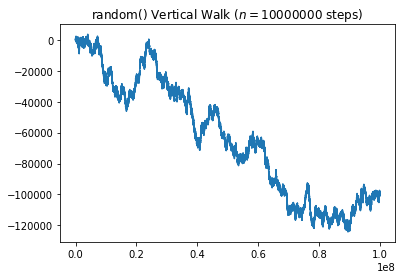

In [ ]:
# Python code for 1D random walk.
import numpy
import pylab
import random

# defining the number of steps
n = 10000000

#x and y will implement the random() approach (PSRNG)
x = numpy.zeros(n)
y = numpy.zeros(n)


# filling the coordinates with random variables
for z in range(1, n):
    val = random.randint(1, 2)
    x[z] = x[z-1]+10
    if val == 1:
        y[z] = y[z-1]+20
    if val == 2:
        y[z] = y[z-1]-20

# plotting stuff 1:
pylab.title("random() Vertical Walk ($n = " + str(n) + "$ steps)")
pylab.plot(x, y)
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()


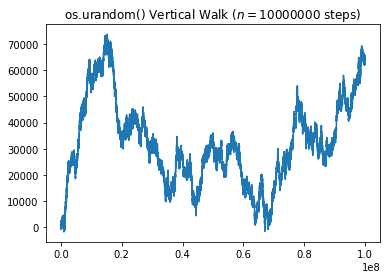

In [ ]:
#i and j will implement the os.urandom() approach (OS entropy source)
i = numpy.zeros(n)
j = numpy.zeros(n)

for m in range(1, n):
    val = random.randint(1, 2)
    i[m] = i[m-1]+10
    if val == 1:
        j[m] = j[m-1]+20
    if val == 2:
        j[m] = j[m-1]-20

# plotting stuff 2:
pylab.title("os.urandom() Vertical Walk ($n = " + str(n) + "$ steps)")
pylab.plot(i, j)
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()

In [ ]:
#!pip3 install qiskit
import qiskit
from qiskit.tools.jupyter import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator

def fiveQubitSeqGenerator():
    
    # Use Aer's qasm_simulator
    simulator = QasmSimulator()

    qreg_q = QuantumRegister(5, 'q')
    creg_c = ClassicalRegister(5, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[3])
    circuit.h(qreg_q[4])
    
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[2], creg_c[2])
    circuit.measure(qreg_q[3], creg_c[3])
    circuit.measure(qreg_q[4], creg_c[4])

    # Draw the circuit
    circuit.draw()

    job = execute(circuit, simulator, shots=1)
                               
    print('Executing Job...\n')                 
    job_monitor(job)
    counts = job.result().get_counts()
    result = list(counts.keys())[0]
    
    return(result)
    #print('RESULT: ',counts,'\n')

if __name__ == "__main__": 
  thirty_bit_res = ""
  for i in range(0,2**8):
      m = fiveQubitSeqGenerator()
      thirty_bit_res = thirty_bit_res + m
  print('5*2**8 BIT QRNG RESULT: ', int(thirty_bit_res), '\n')

Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing Job...

Job Status: job has successfully run
Executing 

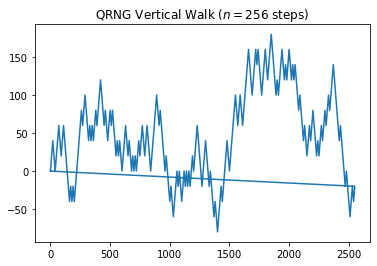

In [ ]:
import numpy
import pylab
import random

#r and t will implement the QRNG approach (OS entropy source)
r = numpy.zeros(len(thirty_bit_res))
t = numpy.zeros(len(thirty_bit_res))
#CHANGE 2**10 BY 2**N
for m in range(1,2**8): #remember thirty_bit_res is still a string 
  val = thirty_bit_res[m]
  r[m] = r[m-1]+10
  if(val == "0"):
      t[m] = t[m-1]+20
  if(val == "1"):
      t[m] = t[m-1]-20

# plotting stuff 3:
pylab.title("QRNG Vertical Walk ($n = " + str(2**8) + "$ steps)")
pylab.plot(r, t)
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()